In [2]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
cwd = os.getcwd()
parent_path = os.path.dirname(cwd)
data_path = os.path.join(parent_path, "data")

m_signal_17_loc = os.path.join(data_path, "Signals", "M_Protocol_17")
m_signal_17 = pd.read_csv(m_signal_17_loc,header=0, delimiter=',', dtype="float64")

i_signal_17_loc = os.path.join(data_path, "upsampled_integrated", "I_Protocol_17")
i_signal_17 = pd.read_csv(i_signal_17_loc,header=0, delimiter=',', dtype="float64")

In [4]:
m_signal_17

,Current,Voltage
0,-0.04099,-66.48706
1,-0.04101,-66.48702
2,-0.04106,-66.48669
3,-0.04107,-66.48075
4,-0.04107,-66.47370
...,...,...
210996,-0.07702,-33.61666
210997,-0.07702,-33.61666
210998,-0.07702,-33.61666
210999,-0.07702,-33.61666


In [5]:
i_signal_17

,Current,Voltage
0,-0.04099,-66.48758
1,-0.04102,-66.48763
2,-0.04106,-66.48768
3,-0.04106,-66.48774
4,-0.04107,-66.48780
...,...,...
210996,-0.07702,-34.47701
210997,-0.07702,-34.51259
210998,-0.07702,-34.54699
210999,-0.07702,-34.56072


In [6]:
V_measured = m_signal_17['Voltage']
V_integrated = i_signal_17['Voltage']

print(V_integrated)

0        -66.48758
1        -66.48763
2        -66.48768
3        -66.48774
4        -66.48780
            ...   
210996   -34.47701
210997   -34.51259
210998   -34.54699
210999   -34.56072
211000   -34.57444
Name: Voltage, Length: 211001, dtype: float64


In [7]:
dV = V_measured - V_integrated
dV

0         0.00052
1         0.00061
2         0.00099
3         0.00699
4         0.01410
           ...   
210996    0.86035
210997    0.89593
210998    0.93033
210999    0.94406
211000    0.95778
Name: Voltage, Length: 211001, dtype: float64

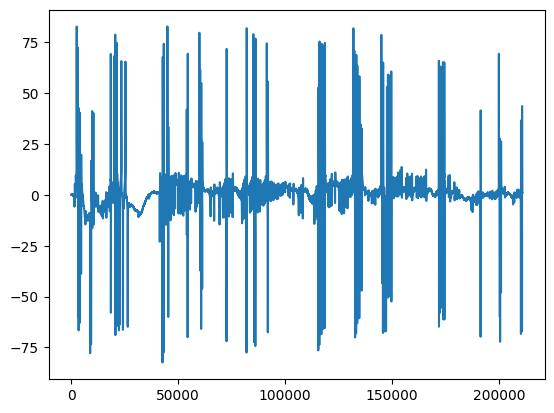

In [8]:
plt.figure()
plt.plot(dV)
plt.show()

In [9]:
df = pd.DataFrame({"V_integrated": V_integrated,
                   "dV": dV})

In [10]:
df

,V_integrated,dV
0,-66.48758,0.00052
1,-66.48763,0.00061
2,-66.48768,0.00099
3,-66.48774,0.00699
4,-66.48780,0.01410
...,...,...
210996,-34.47701,0.86035
210997,-34.51259,0.89593
210998,-34.54699,0.93033
210999,-34.56072,0.94406


In [11]:
df.to_csv("modelled_signal_and_error_train_p17.csv", index=False)

In [12]:
def mackey_glass(T=1000, tau=17):
    x = np.zeros(T + tau)
    x[tau] = 0.5  # Initial condition

    for t in range(tau, T + tau - 1):
        x[t + 1] = x[t] + 0.1 * (
            0.2 * x[t - tau] / (1 + x[t - tau] ** 10) - 0.1 * x[t]
        )

    return x[tau:]

In [19]:
from reservoirpy.datasets import mackey_glass
data = mackey_glass(1000, 17)

In [20]:
type(data)

numpy.ndarray

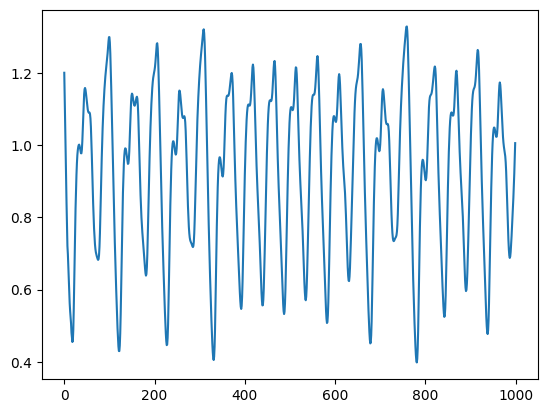

In [21]:
plt.plot(data)